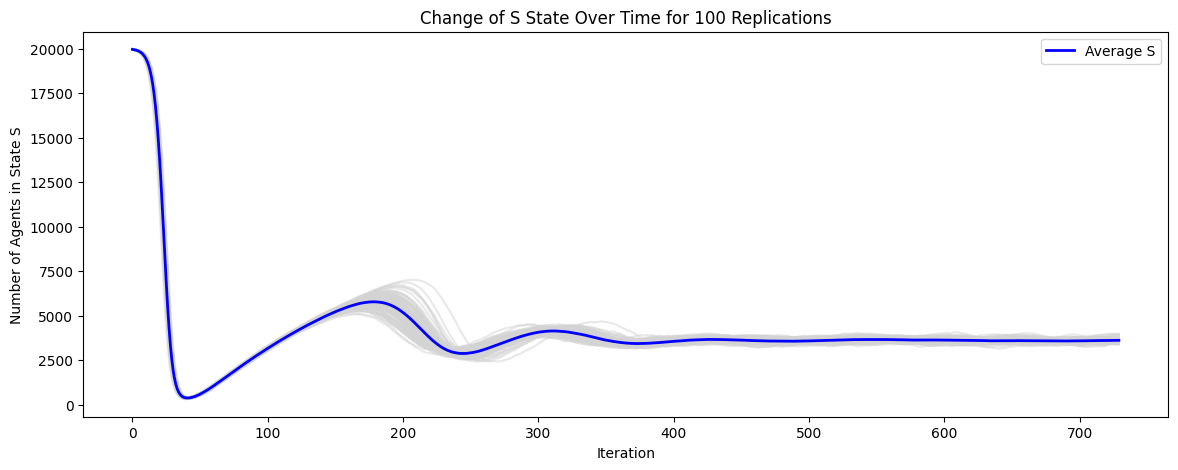

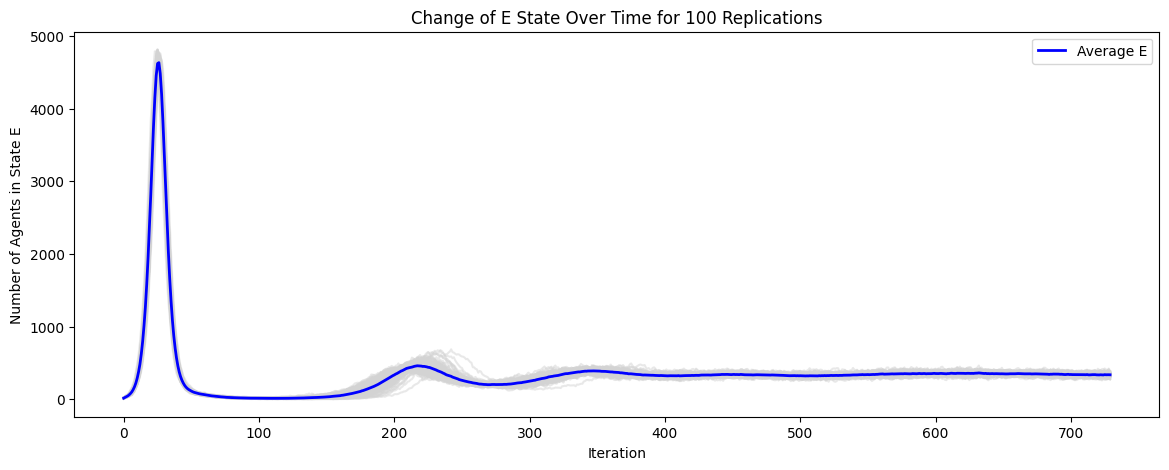

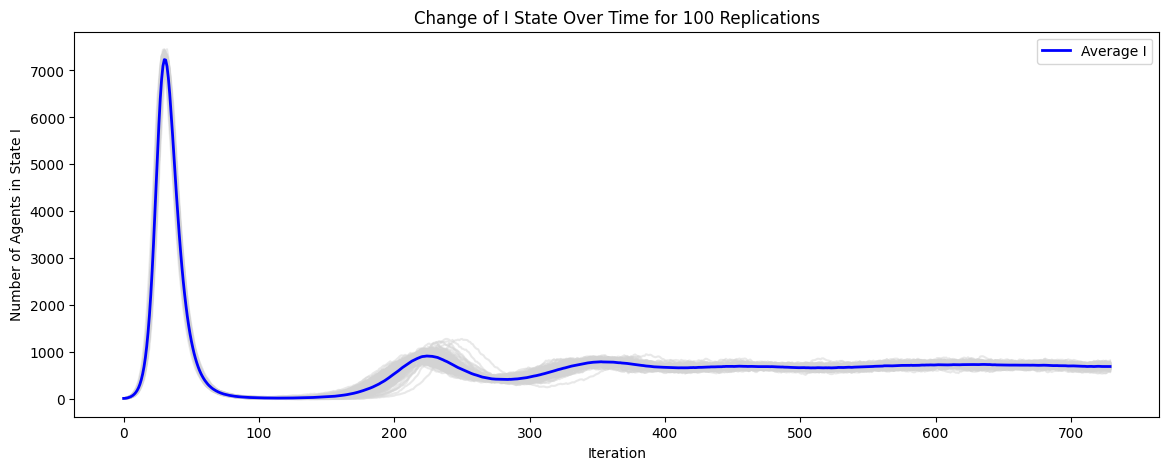

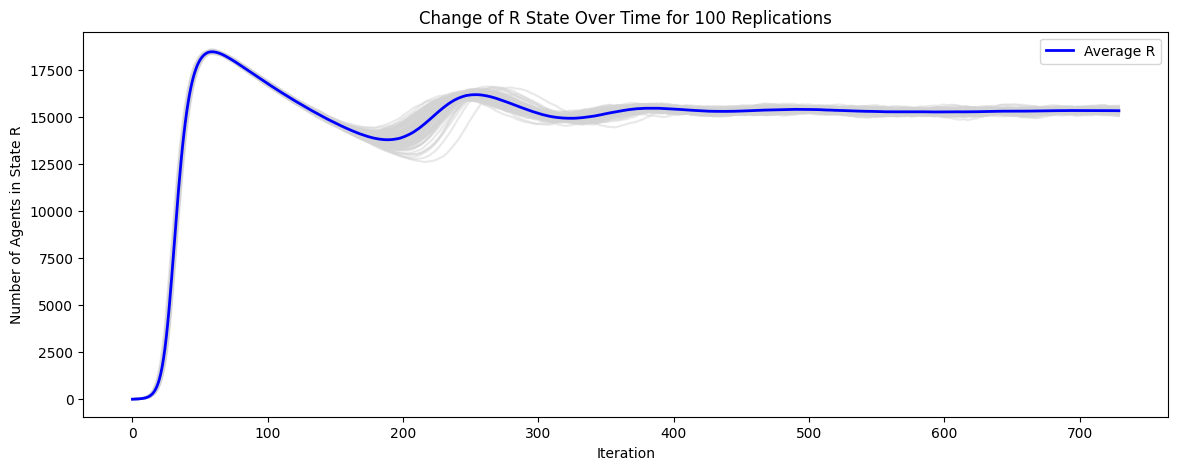

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob

file_pattern = './simulation_results/simulation_result_*.csv'
file_list = glob.glob(file_pattern)

if not file_list:
    print("No files found")
else:
    data_frames = [pd.read_csv(file) for file in file_list]

    if data_frames:
        states = ['S', 'E', 'I', 'R']
        
        iterations = data_frames[0]['Iteration']

        for index, state in enumerate(states):
            # 对每个状态创建一个新的图形
            plt.figure(figsize=(14, 5))

            for df in data_frames:
                plt.plot(df['Iteration'], df[state], color='lightgray', alpha=0.5)
            
            average_state = np.mean([df[state].values for df in data_frames], axis=0)
            
            plt.plot(iterations, average_state, color='blue', label=f'Average {state}', linewidth=2)
            plt.title(f'Change of {state} State Over Time for 100 Replications')
            plt.xlabel('Iteration')
            plt.ylabel(f'Number of Agents in State {state}')
            plt.legend()
            
            plt.show()
    else:
        print("No data to plot.")
